A simple first analysis.

Every daily milk yield is categorized by the the temperature and THI

Plotted for each farm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
sns.set()

In [2]:
milk = pd.read_csv("AllMilkingsDaily_Weather.csv")
milk["Timestamp"] = pd.to_datetime(milk["Timestamp"])
milk = milk.set_index("Timestamp")

milk = milk[milk["FarmName_Pseudo"].isin(["ad0a39f5", "752efd72", "5c06d92d", "540275a1", "a624fb9a", "f454e660", "ab18b151"])]

In [3]:
rDict = {"a624fb9a": "Farm 1",
    "ab18b151": "Farm 2",
    "540275a1": "Farm 3",
    "5b581702": "Farm 4",
    "5c06d92d": "Farm 5",
    "a756bc39": "Farm 6",
    "ad0a39f5": "Farm 7",
    "752efd72": "Farm 8",
    "f454e660": "Farm 9"}
    
milk = milk.replace({"FarmName_Pseudo": rDict})

farmNames = milk["FarmName_Pseudo"].unique()
farmNames = sorted(farmNames)

In [4]:
milk = milk.assign(tempCat=pd.cut(milk['T_C_mean'], bins=[-100, 14, 16, 18, 20, 22, 24, 40], labels=['<14', '14-16', '16-18', '18-20', '20-22', '22-24', '>24']))
milk = milk.assign(thiCat=pd.cut(milk['THI_mean'], bins=[0, 60, 65, 70, 75, 80, 90], labels=['<60', '60-65', '65-70', '70-75', '75-80', '>80']))
summermilk = milk[milk.index.month.isin([6,7,8])]

In [5]:
colors = ["#CE0037", "#00b0b9", "#FFB81C", "#509E2F", "#672146", "#007681", "#996017", "#79863C"]
customPalette = sns.set_palette(sns.color_palette(colors))

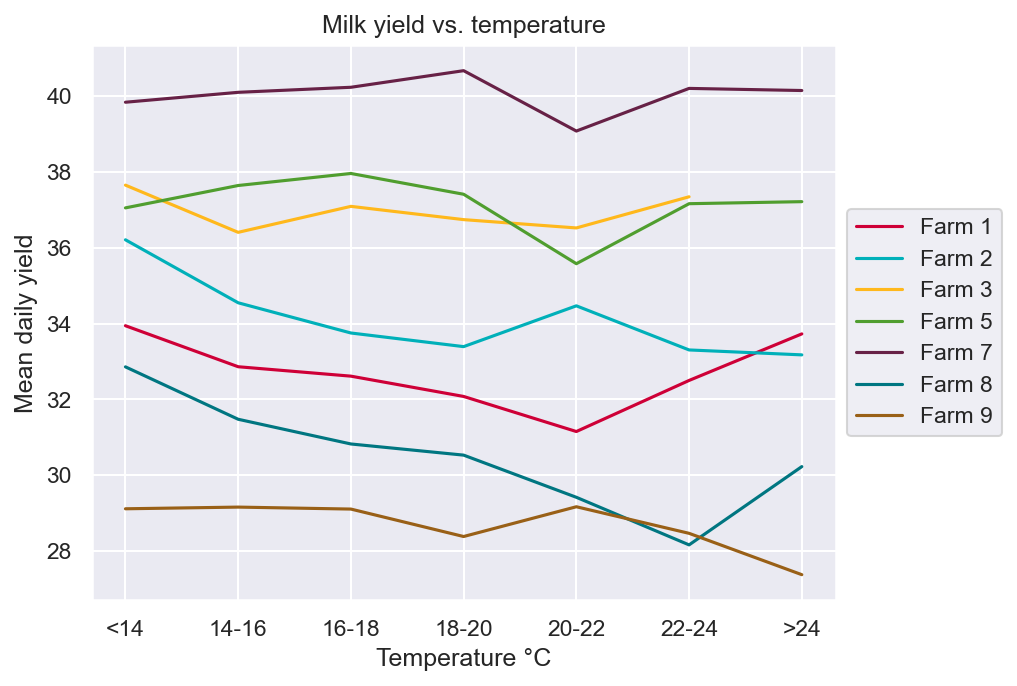

In [20]:
for name in farmNames:
    farm = milk[milk["FarmName_Pseudo"] == name]
    farm = farm.groupby("tempCat").agg({"DailyYield": ["mean", "std", "count"]})
    sns.lineplot(farm["DailyYield"]["mean"], errorbar=None)
plt.xlabel("Temperature \N{DEGREE SIGN}C")
plt.ylabel("Mean daily yield")
plt.title("Milk yield vs. temperature")
plt.legend(farmNames, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



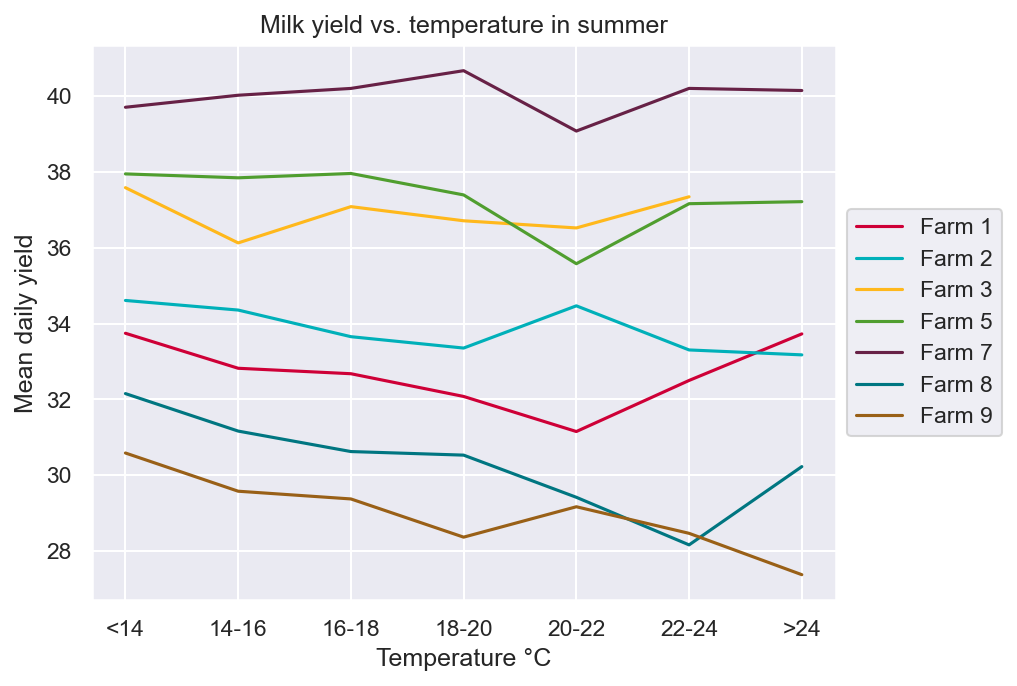

In [51]:
for name in farmNames:
    farm = summermilk[summermilk["FarmName_Pseudo"] == name]
    farm = farm.groupby("tempCat").agg({"DailyYield": ["mean", "std", "count"]})
    sns.lineplot(farm["DailyYield"]["mean"], errorbar=None)
plt.xlabel("Temperature \N{DEGREE SIGN}C")
plt.ylabel("Mean daily yield")
plt.title("Milk yield vs. temperature in summer")
plt.legend(farmNames, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

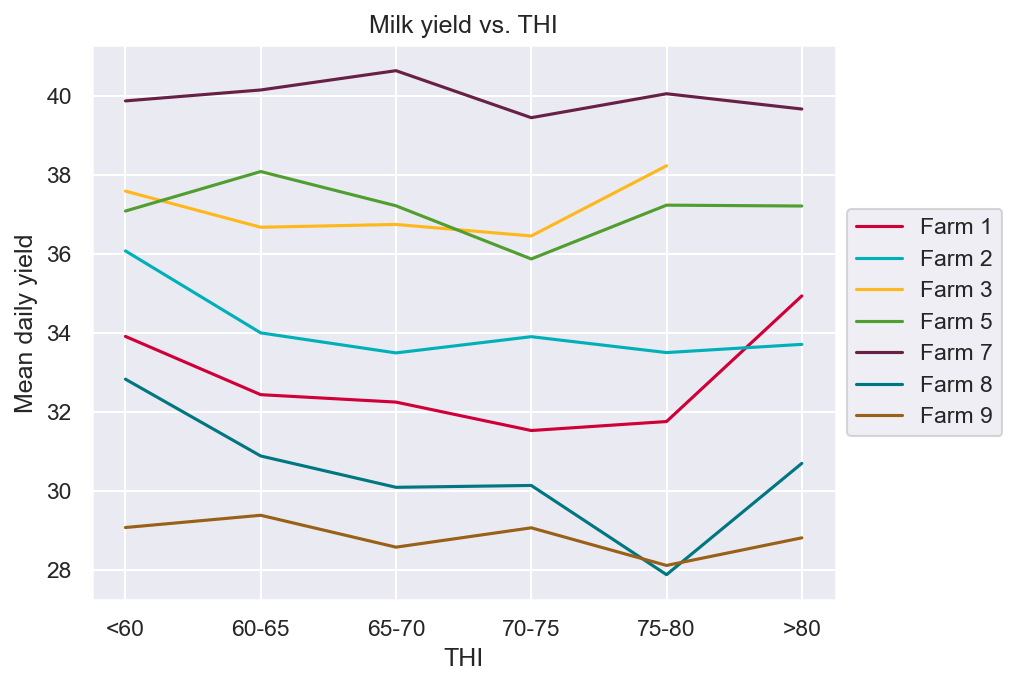

In [52]:
for name in farmNames:
    farm = milk[milk["FarmName_Pseudo"] == name]
    farm = farm.groupby("thiCat").agg({"DailyYield": ["mean", "std", "count"]})
    sns.lineplot(farm["DailyYield"]["mean"], errorbar=None)
plt.xlabel("THI")
plt.ylabel("Mean daily yield")
plt.title("Milk yield vs. THI")
plt.legend(farmNames, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

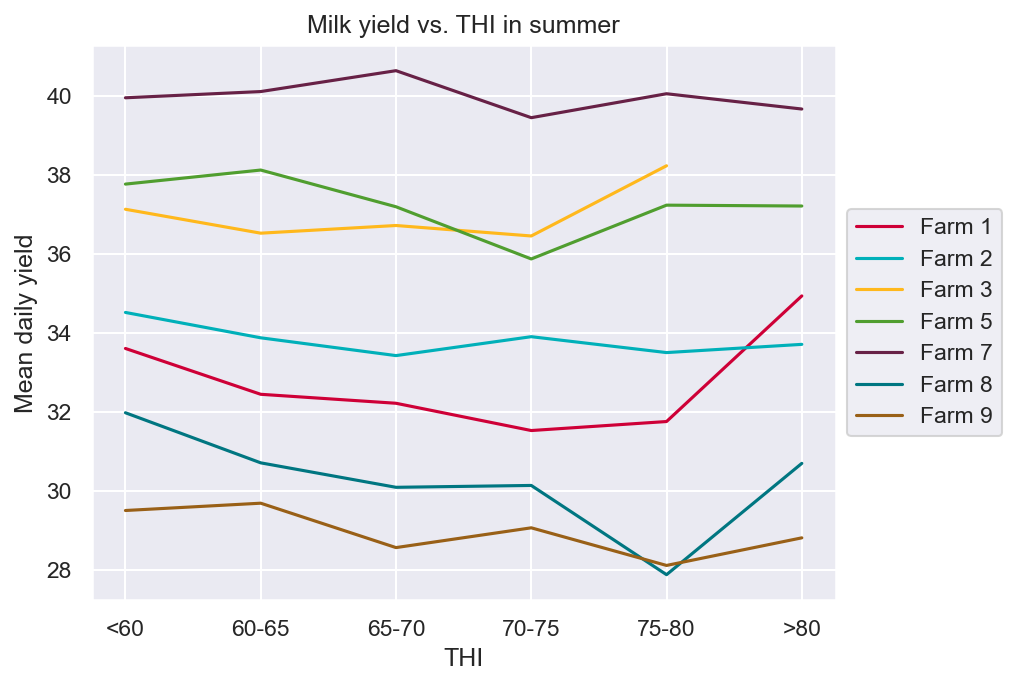

In [53]:
for name in farmNames:
    farm = summermilk[summermilk["FarmName_Pseudo"] == name]
    farm = farm.groupby("thiCat").agg({"DailyYield": ["mean", "std", "count"]})
    sns.lineplot(farm["DailyYield"]["mean"], errorbar=None)
plt.xlabel("THI")
plt.ylabel("Mean daily yield")
plt.title("Milk yield vs. THI in summer")
plt.legend(farmNames, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()